In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


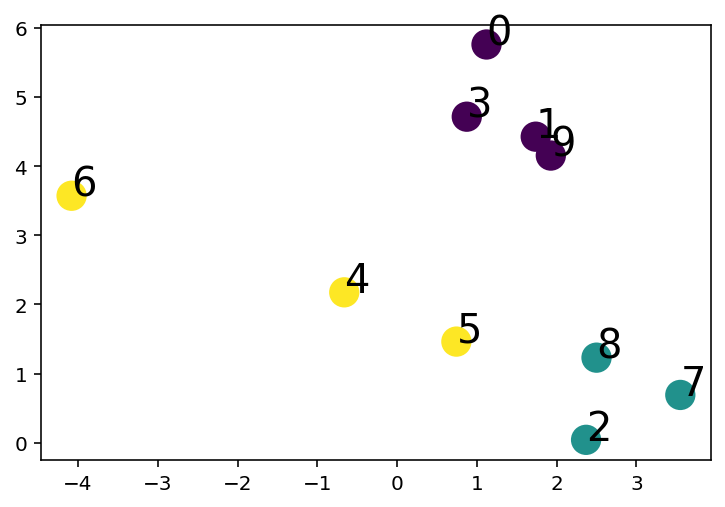

In [2]:
# Create a dataset with K_dataset clusters
K_dataset = 3

X, y = make_blobs(n_samples=10, centers=K_dataset, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='viridis')
# Annotate sample number
for i in range(X.shape[0]):
    plt.annotate(i, (X[i, 0], X[i, 1]), fontsize=20)


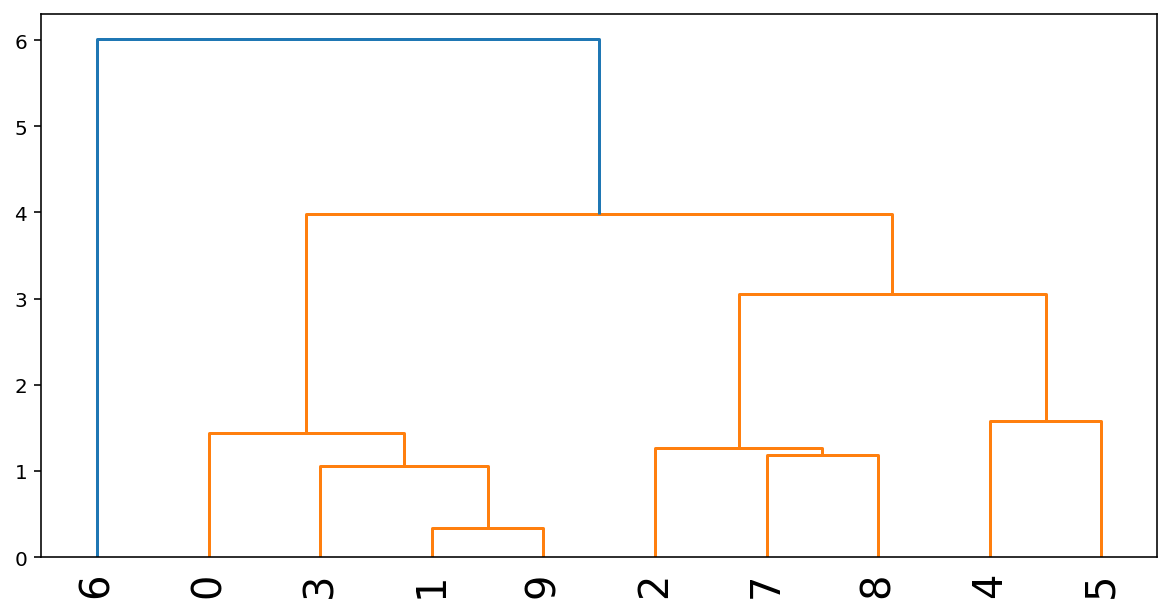

In [3]:
# Show after 1 step of hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'average')
plt.figure(figsize=(10, 5))

dendrogram(Z, labels=range(X.shape[0]), leaf_rotation=90, leaf_font_size=20)
plt.show()

In [4]:
# Pairwise distance matrix
from scipy.spatial.distance import pdist, squareform

# Compute the distance matrix
dist = pdist(X, metric='euclidean')
dist = squareform(dist)
X_index = [f"P{x}" for x in np.arange(X.shape[0])]
df = pd.DataFrame(dist, index=X_index, columns=X_index)
df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9
P0,0.000000,1.468503,5.849187,1.072565,4.001437,4.311101,5.641206,5.617833,4.732056,1.796596
P1,1.468503,0.000000,4.427098,0.911272,3.289419,3.124431,5.879548,4.149512,3.283718,0.332095
P2,5.849187,4.427098,0.000000,4.904326,3.705648,2.158345,7.350236,1.347556,1.194950,4.132565
P3,1.072565,0.911272,4.904326,0.000000,2.966927,3.253476,5.083095,4.830950,3.843925,1.193839
P4,4.001437,3.289419,3.705648,2.966927,0.000000,1.575484,3.691478,4.465344,3.299630,3.257210
P5,4.311101,3.124431,2.158345,3.253476,1.575484,0.000000,5.263313,2.910477,1.771561,2.937847
P6,5.641206,5.879548,7.350236,5.083095,3.691478,5.263313,0.000000,8.154381,6.982831,6.034281
P7,5.617833,4.149512,1.347556,4.830950,4.465344,2.910477,8.154381,0.000000,1.180379,3.821671
P8,4.732056,3.283718,1.194950,3.843925,3.299630,1.771561,6.982831,1.180379,0.000000,2.976718
P9,1.796596,0.332095,4.132565,1.193839,3.257210,2.937847,6.034281,3.821671,2.976718,0.000000


<AxesSubplot:>

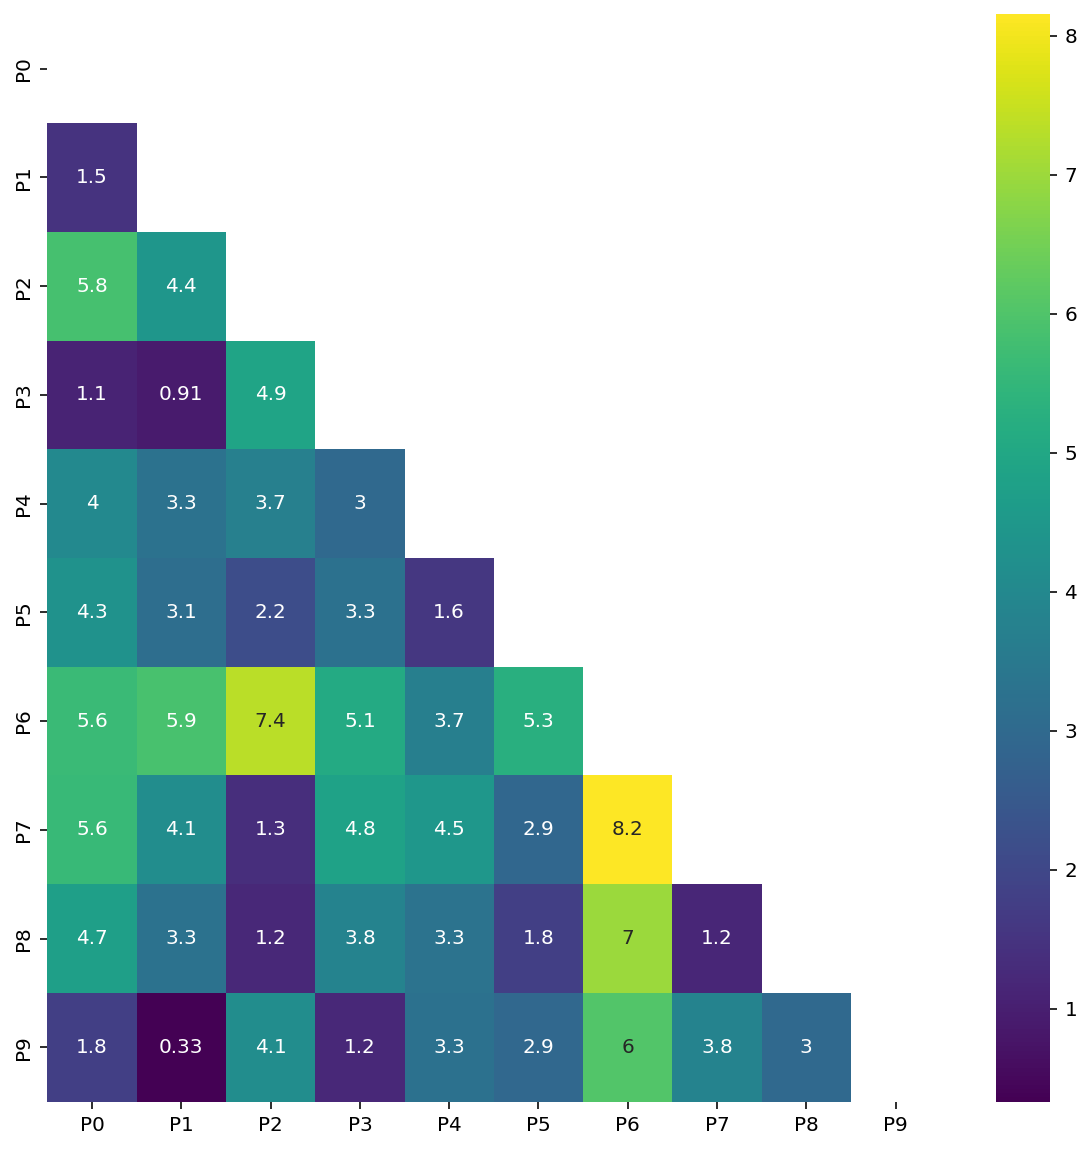

In [5]:
import seaborn as sns
# use lower triangle of matrix
mask = np.zeros_like(dist, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
# Make heatmap with seaborn and mask, mentining column and row names
sns.heatmap(dist, mask=mask, xticklabels=X_index, yticklabels=X_index, annot=True, cmap='viridis')

In [7]:
# Combine closest clusters 
# (i.e. the two clusters with the smallest distance)

# Find the two clusters with the smallest distance ignoring the diagonal
# (i.e. the distance between a cluster and itself)
np.fill_diagonal(dist, np.inf)
i, j= np.unravel_index(np.argmin(dist), dist.shape)
print(i, j)


1 9


In [8]:
# Combine the two clusters to a single "point"
X_new = np.vstack([X[i], X[j]])
new_point_name = f'{i} & {j}'
new_point_value = X_new.mean(axis=0)
print(new_point_name, new_point_value)

# Add new point to the dataset, remove the two old points
X = np.vstack([X, new_point_value])
X = np.delete(X, [i, j], axis=0)
print(X.shape)
#Update X_index to reflect the new point and the removed points
X_index = [f"P{x}" for x in range(10) if x not in [i, j]]
X_index.append(new_point_name)

# Compute the distance matrix
dist = pdist(X, metric='euclidean')
dist = squareform(dist)
df = pd.DataFrame(dist, index=X_index, columns=X_index)

1 & 9 [1.83183315 4.28894623]
(9, 2)


In [9]:
df

,P0,P2,P3,P4,P5,P6,P7,P8,1 & 9
P0,0.000000,5.849187,1.072565,4.001437,4.311101,5.641206,5.617833,4.732056,1.632347
P2,5.849187,0.000000,4.904326,3.705648,2.158345,7.350236,1.347556,1.194950,4.279144
P3,1.072565,4.904326,0.000000,2.966927,3.253476,5.083095,4.830950,3.843925,1.048934
P4,4.001437,3.705648,2.966927,0.000000,1.575484,3.691478,4.465344,3.299630,3.269140
P5,4.311101,2.158345,3.253476,1.575484,0.000000,5.263313,2.910477,1.771561,3.028025
P6,5.641206,7.350236,5.083095,3.691478,5.263313,0.000000,8.154381,6.982831,5.955102
P7,5.617833,1.347556,4.830950,4.465344,2.910477,8.154381,0.000000,1.180379,3.985504
P8,4.732056,1.194950,3.843925,3.299630,1.771561,6.982831,1.180379,0.000000,3.129577
1 & 9,1.632347,4.279144,1.048934,3.269140,3.028025,5.955102,3.985504,3.129577,0.000000


<AxesSubplot:>

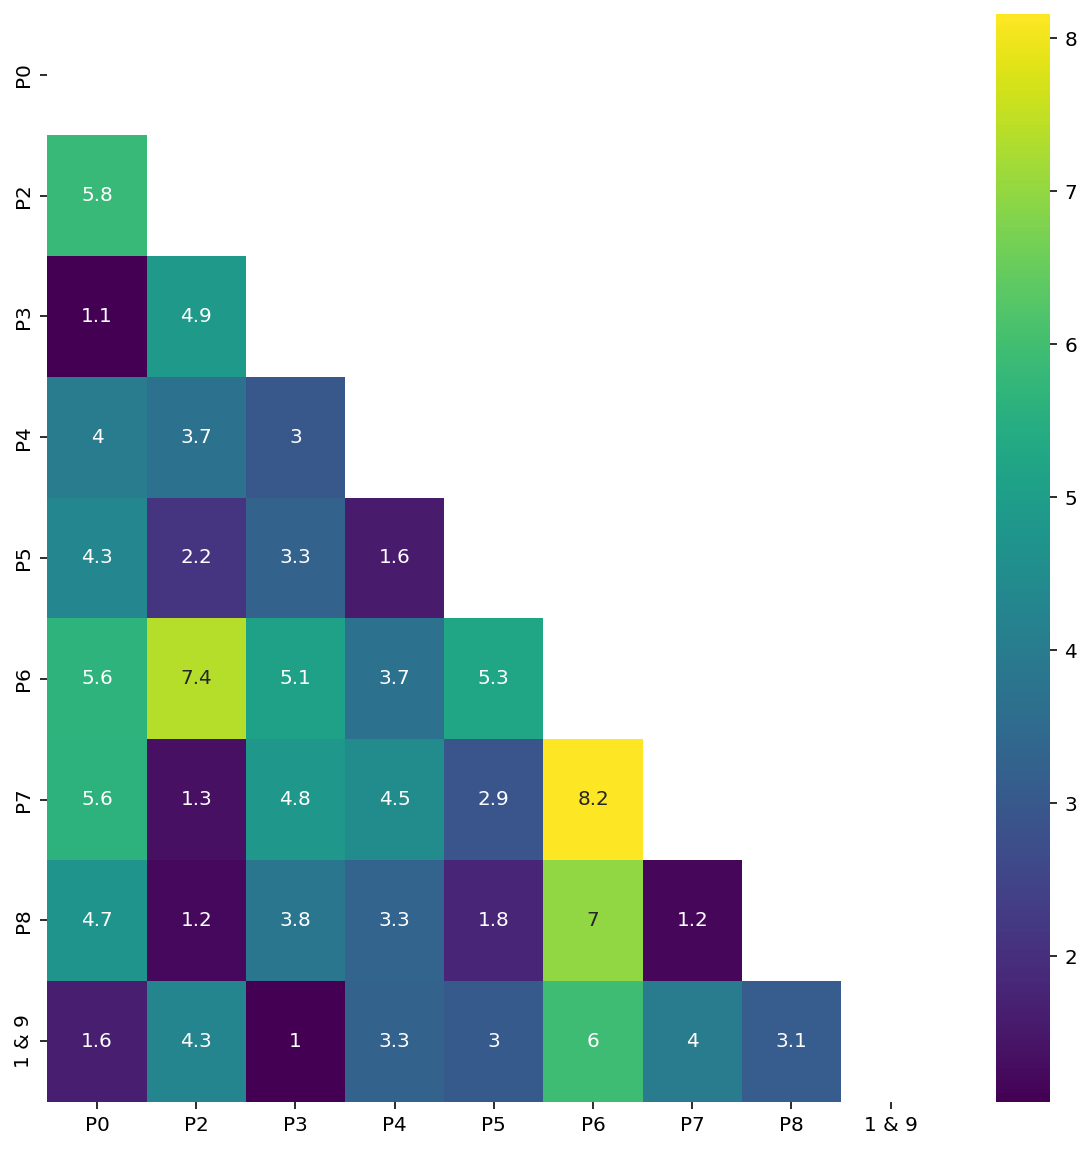

In [10]:
mask = np.zeros_like(dist, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
# Make heatmap with seaborn and mask, mentining column and row names
sns.heatmap(dist, mask=mask, xticklabels=X_index, yticklabels=X_index, annot=True, cmap='viridis')